*** Continue to use the survey data frame from the package MASS for the next few exercises. ***

*** a. Using your fitted model of student height on writing handspan, survfit, provide point estimates and 99 percent confidence
intervals for the mean student height for handspans of 12, 15.2, 17, and 19.9 cm.***


In [2]:
library("MASS")
survfit <- lm(Height~Wr.Hnd,data=survey)
summary(survfit)


Call:
lm(formula = Height ~ Wr.Hnd, data = survey)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7276  -5.0706  -0.8269   4.9473  25.8704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 113.9536     5.4416   20.94   <2e-16 ***
Wr.Hnd        3.1166     0.2888   10.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.909 on 206 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.3612,	Adjusted R-squared:  0.3581 
F-statistic: 116.5 on 1 and 206 DF,  p-value: < 2.2e-16


In [14]:
conf_interval <- data.frame(Wr.Hnd = c(12,15.2,17,19.9))
conf_interval
predict(survfit, newdata = conf_interval, interval = "confidence", level = 0.99)


Wr.Hnd
12.0
15.2
17.0
19.9


,fit,lwr,upr
1,151.3530,146.0901,156.6159
2,161.3262,158.3051,164.3473
3,166.9361,164.9985,168.8737
4,175.9743,174.3066,177.6420



*** b. In Section 20.1, you defined the object incomplete.obs, a numeric vector that provides the records of survey that were automatically removed from consideration when estimating the model parameters. Now, use the incomplete.obs vector along with survey and Equation (20.3) to calculate βˆ0 and βˆ1 in R. (Remember the functions mean, sd, and cor. Ensure your answers match the output from survfit.) ***



In [18]:
library("MASS")
incomplete.obs <- which(is.na(survey$Height)|is.na(survey$Wr.Hnd))
x <- survey$Wr.Hnd[-incomplete.obs]
y <- survey$Height[-incomplete.obs]
mu.x <- mean(x)
mu.y <- mean(y)
sd.x <- sd(x)
sd.y <- sd(y)
cor.xy <- cor(x,y)
b1.hat <- sd.y * cor.xy/sd.x
cat("b1.hat = ", b1.hat)
b0.hat <- mu.y - b1.hat*mu.x
cat("\n")
cat("b0.hat = ", b0.hat)

b1.hat =  3.116617
b0.hat =  113.9536

*** c. The survey data frame has a number of other variables present aside from Height and Wr.Hnd. For this exercise, the end aim is to fit a simple linear model to predict the mean student height, but this time from their pulse rate, given in Pulse (continue to assume the conditions listed in Section 20.2 are satisfied). ***

    i. Fit the regression model and produce a scatterplot with the fitted line superimposed upon the data. Make sure you can write down the fitted model equation and keep the plot open.

    ii. Identify and interpret the point estimate of the slope, as well as the outcome of the test associated with the hypotheses
           H0 : β1 = 0; HA : β1 != 0. 
       Also find a 90 percent CI for the slope parameter.

    iii. Using your model, add lines for 90 percent confidence and prediction interval bands on the plot from (i) and add a legend to differentiate between the lines.

    iv. Create an incomplete.obs vector for the current “height on pulse” data. Use that vector to calculate the sample mean of the height observations that were used for the model fitted in (i). Then add a perfectly horizontal line to the plot at this mean (use color or line type options to avoid confusion with the other lines present). What do you notice? Does the plot support your conclusions from (ii)?


Call:
lm(formula = Height ~ Pulse, data = survey)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3543  -7.2019  -0.9439   7.2622  26.1168 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 177.85708    4.93485  36.041   <2e-16 ***
Pulse        -0.07225    0.06598  -1.095    0.275    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.884 on 169 degrees of freedom
  (66 observations deleted due to missingness)
Multiple R-squared:  0.007046,	Adjusted R-squared:  0.001171 
F-statistic: 1.199 on 1 and 169 DF,  p-value: 0.275


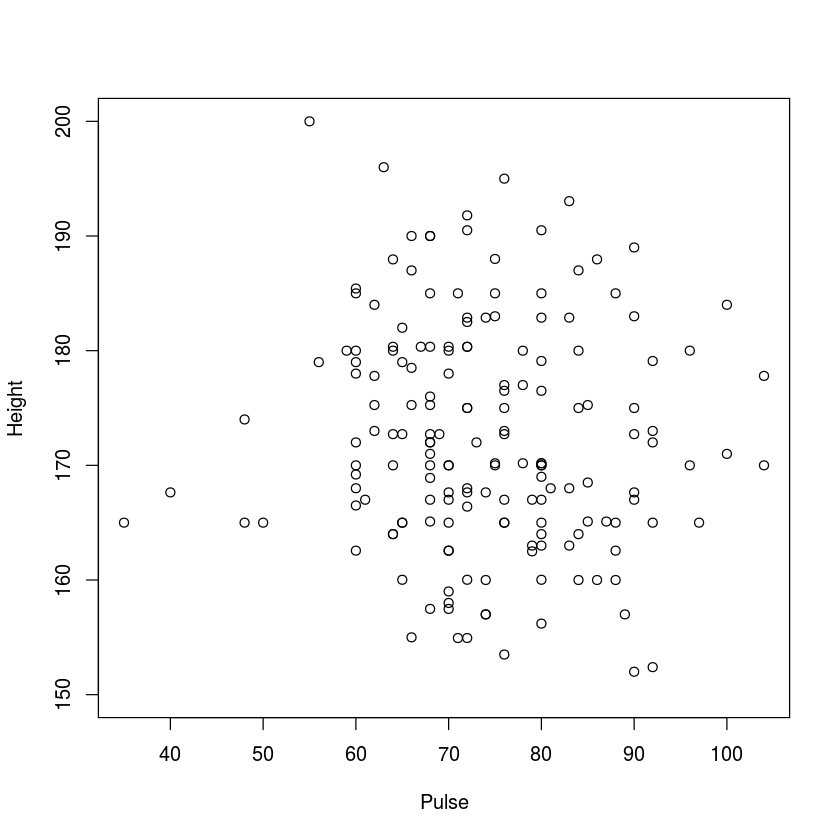

In [28]:
plot(Height~Pulse, data = survey)
pulsefit <- lm(Height~Pulse, data = survey)
summary(pulsefit)
mycoefs <- coef(pulsefit)
beta0.hat <- mycoefs[1]
beta1.hat <- mycoefs[2]


In [31]:
cat("p-value is 0.275 which is much larger than significance level 0.1. Hence we cant reject Ho.")
#90 percent CI for the slope parameter
confint(pulsefit, level = 0.90)

p-value is 0.275 which is much larger than significance level 0.1. Hence we cant reject Ho.

,5 %,95 %
(Intercept),169.6952304,186.01892281
Pulse,-0.1813757,0.03687061


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  35.00   66.00   72.50   74.15   80.00  104.00      45 

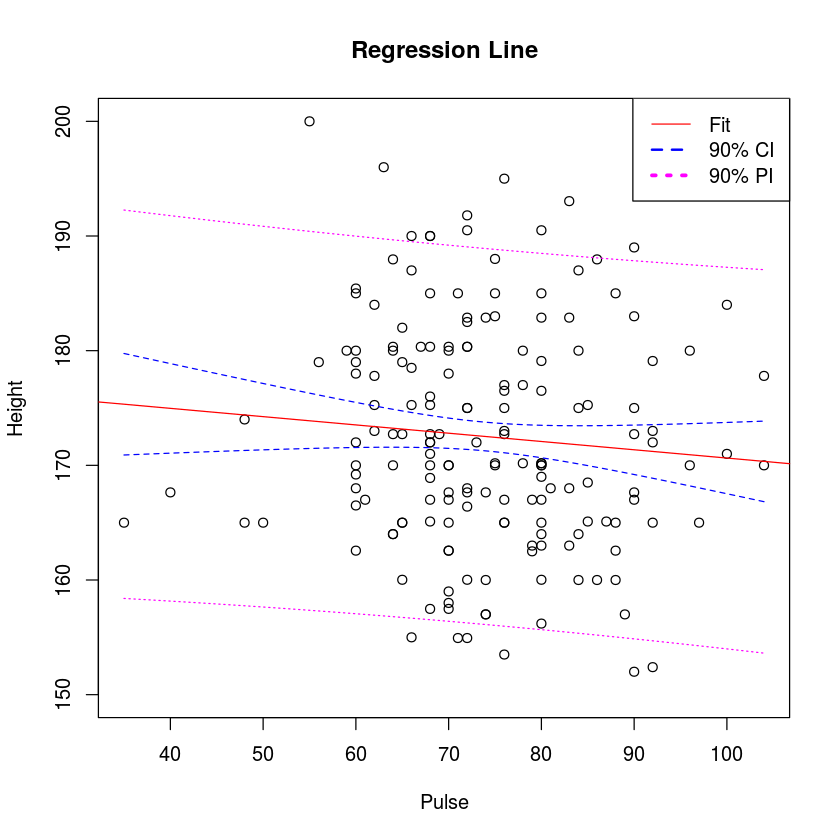

In [75]:
summary(survey$Pulse)
newx <- seq(35,104, by = 0.05)
plot(Height~Pulse, data = survey, main = "Regression Line")
abline(pulsefit, col = "red", lwd = "1", lty = 1)
conf_interval <- predict(pulsefit, newdata = data.frame(Pulse = newx), interval = "confidence", level = 0.9)
lines(newx, conf_interval[,2], col = "blue", lty = 2)
lines(newx, conf_interval[,3], col = "blue", lty = 2)

pred_interval <- predict(pulsefit, newdata = data.frame(Pulse = newx), interval = "prediction", level = 0.9)
lines(newx, pred_interval[,2], col = "magenta", lty = 3)
lines(newx, pred_interval[,3], col = "magenta", lty = 3)

legend("topright", legend = c("Fit", "90% CI", "90% PI"), lty = c(1,2,3), col = c("red", "blue", "magenta")
       , lwd = c(1,2,3))

In [80]:
incomplete.obs <- which(is.na(survey$Height)|is.na(survey$Pulse))
x <- survey$Pulse[-incomplete.obs]
y <- survey$Height[-incomplete.obs]
mu.x <- mean(x)
mu.y <- mean(y)
sd.x <- sd(x)
sd.y <- sd(y)
cor.xy <- cor(x,y)
b1.hat <- sd.y * cor.xy/sd.x
cat("b1.hat = ", b1.hat)
b0.hat <- mu.y - b1.hat*mu.x
cat("\n")
cat("b0.hat = ", b0.hat)

b1.hat =  -0.07225256
b0.hat =  177.8571

*** Next, examine the help file for the mtcars data set, which you first saw in Exercise 13.4 on page 287. For this exercise, the goal is to model fuel efficiency, measured in miles per gallon (MPG), in terms of the overall weight of the vehicle (in thousands of pounds). ***


*** d. Plot the data—mpg on the y-axis and wt on the x-axis. ***


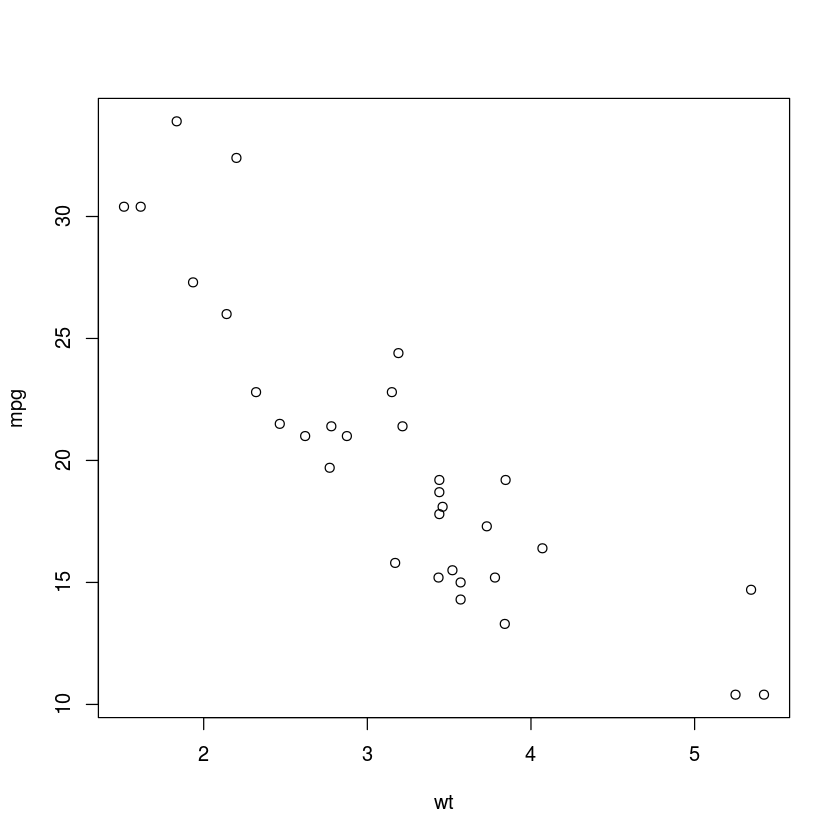

In [84]:
plot(mpg~wt, data = mtcars)

*** e. Fit the simple linear regression model. Add the fitted line to the plot from (d). ***


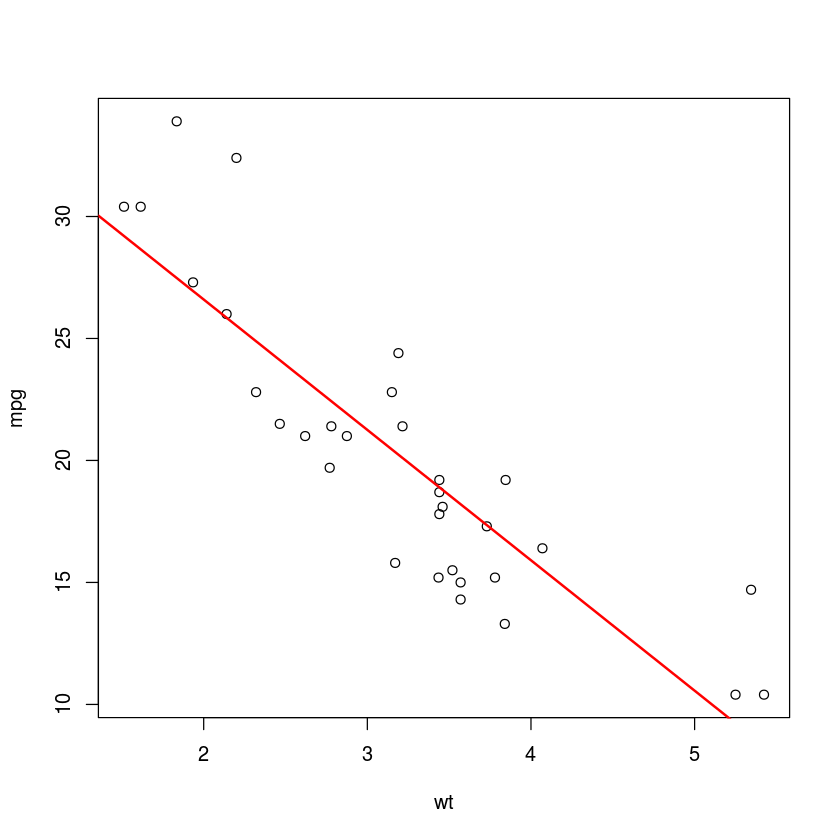

In [86]:
regression.model <- lm(mpg~wt, data = mtcars)
plot(mpg~wt, data = mtcars)
abline(regression.model, lwd = "2", col = "red")

*** f. Write down the regression equation and interpret the point estimate of the slope. Is the effect of wt on mean mpg estimated to be statistically significant? ***


In [87]:
summary(regression.model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


*** g. Produce a point estimate and associated 95 percent PI for a car that weighs 6,000 lbs. Do you trust the model to predict observations accurately for this value of the explanatory variable? Why or why not? ***

In [96]:
xvals <- data.frame(wt = 6)
mypred.pi <- predict(regression.model, newdata  = xvals, interval = "prediction", level = 0.95)
mypred.pi



,fit,lwr,upr
1,5.218297,-1.85279,12.28938


I dont trust the model to predict observations accurately for this value of the explanatory variable because 6 is out of range.